# Python training UGA 2017

**A training to acquire strong basis in Python to use it efficiently**

Pierre Augier (LEGI), Cyrille Bonamy (LEGI), Eric Maldonado (Irstea), Franck Thollard (ISTERRE), Oliver Henriot (GRICAD), Christophe Picard (LJK)

# Practical 2: Numpy and Matplotlib

## Goal
The goal of this session is to extract statistical information from raw data using numpy and make plot of process data using matplotlib.

The first step is to load different different log file and save the results like in the previous session

## Step 2.0

Extract files from the tar ball *TP2_numerics/data/json_dicts.tgz*

## Step 2.1
Write a function *load_dict(file_name)* that loads a log file into a dictonary and return it.

Test the function by printing the dictionnary using python and reading the file directly (*e.g* using cat/more/less/....)

## Step 2.2

Given the directory containing a set of files of the form *wiki.NUMBER.json*, write a function `sort_dict_files` that takes as input a directory name and return the set of files of the form *wiki.NUMBER.json* sorted in increasing number according to *NUMBER*.

You can go through the following step: 

- read the directory (**hint**: check the functions `os.listdir` and `glob.glob`).
- build a list of integers, in which each integer is built by removing the *wiki.* and *.json* part of the file names (**hint** use either slicing, the sub-function of the re module or the `replace` method of *str* class). 
- sort the above list in increasing order (**hint** use the *sorted* method).
- build the final sorted file name list by re-adding the *wiki.* prefix and the *.json* suffix to the filenames (**hint** use comprehension list and the *format* method of *str*.
- return the final list.

## Step 2.3
Write a function `load_dicts` that takes as input a directory and loads all the dictionaries in the right order

**Hint**: use the above functions, and comprehension list.

## Step 2.4
Write a function `select_language` that takes as input the list of dictionaries and a language, and return the ordered list of query count for that language. 
 
If language is 'fr', goes from 

In [ ]:
[ {'es':100, 'fr':300, 'en':5000},
  {'es':90, 'fr':340, 'en':5030},
  {'es':110, 'fr':380, 'en':4980},
]

to

In [ ]:
[300, 340, 380]

**Hint**
- languages are keys of the dictionaries
- use the set data structure and its *update* method

## Step 2.5

Write a function `build_matrix_from_dicts` that output:

- an array `occurrences` (numpy array) in which each row represents statistics for a given language. Statistics are updated with the occurrences of the language for a specific file: `occurrences[ilang, itime]`, where `ilang` is an index representing a language, `itime` is an index representing the file.
- the language mapping *languages* such that *languages[3] = 'fr'* if the row 3 in `occurrences` represents French.

**Hint**:
- Use above functions 

## Step 2.6

Write a function `select_languages` that takes as input the above array, the language mapping *languages*, and a list of languages (represented as strings) and returns `occurrences` reduced to the provided languages.

## Step 2.7

Write a function `show_languages` that takes as input an occurrence array and a language mapping and plot the occurrences (for example basically one line for each language).

## Step 2.8

Write a function `compute_L2_dist` that takes as input two numpy arrays and returns the euclidian distance between the two vectors. 

**Hint** 
- write a first python like function
- write a vectorized version, *i.e.* computes the distance using array multiplication.
  
  $d(X, Y) = \sum_i (x_i-y_i)^2$
  
  $d(X, Y) = \sum_i x_i^2 + \sum_i y_i^2 - 2 \sum_i x_i  y_i$
  

## Step 2.9

Go to the interpretor and import your module. Now, let's talk to the data. 

Sort languages by decreasing average query counts and select of subset of languages of interest (loi).

**Hints**
- Use the previous functions to load the matrix
- Use `np.average` with the `axis` keyword set correctly
- Use `np.argsort`

## Step 3.0

- plot the statistics of the set of the language of interest. 
- plot the statistics of the set of language of interest reduced to a subset of timestamps of interest.


## Step 3.1

Go back to the script/module : 

write a function `build_dist_mat` that build the distance array $D$ such that $D[c_i, c_j] = L_2[c_i, c_j]$ where $c_i$ and $c_j$ represents countries and $L_2$ the euclidian distance between the timestamps vector of $c_i$ and $c_j$. 

**Hints**

- Use *compute_L2_dist*
- Vectorize this computation using *np.newaxis*, dot product, *np.square* with axis correctly set.

On peut les amener vers ça : 


In [1]:
import numpy as np
A = np.array([[1,1,1,1],[2,2,2,2]])
B = np.array([[1,2,3,4],[1,1,1,1],[1,2,1,9]])
three_sums = np.sum(np.square(A)[:, np.newaxis, :], axis=2) - 2 * A.dot(B.T) + np.sum(np.square(B), axis=1)
dist = np.sqrt(three_sums)
dist

array([[ 3.74165739,  0.        ,  8.06225775],
       [ 2.44948974,  2.        ,  7.14142843]])

In [11]:
A[:, None, :].shape

(2, 1, 4)

See solution 7 from 

http://stackoverflow.com/questions/27948363/numpy-broadcast-to-perform-euclidean-distance-vectorized

## Step 3.2

Plot the distance matrix $D$ using matplotlib function `plt.matshow`.

In [21]:
# this ipython command loads a special backend for notebooks (do not use outside jupyter)
%matplotlib notebook

import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


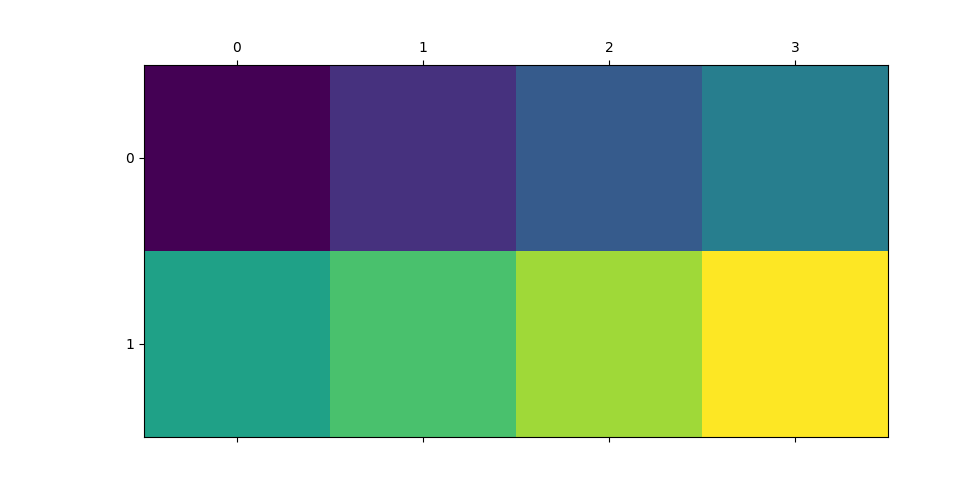

In [20]:
a = np.arange(8).reshape([2, 4])
plt.matshow(a)